In [1]:
from binarypipe import imagepipe as ip

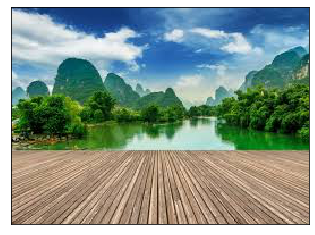

In [6]:
ip.plot("images/1.jpeg")

In [7]:
img= ip.load_img("images/fruits.png")
img= ip.img_to_array(img)

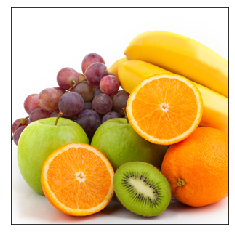

In [8]:
ip.plot(img)

In [9]:
img.shape

(300, 300, 3)

In [10]:
def rgb2gray(img):
    arr= img.sum(axis=2)
    arr= arr/3.0
    return arr

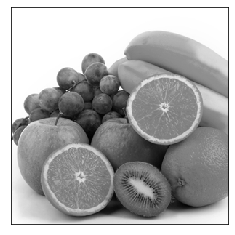

In [11]:
gimg= rgb2gray(img)
ip.plot(gimg)

Value: (0.0, 76.5), Color: (255, 0, 0)
Mask sum is 7302
Value: (76.5, 127.5), Color: (0, 255, 0)
Mask sum is 16032
Value: (127.5, 178.5), Color: (0, 0, 255)
Mask sum is 31891
Value: (178.5, 255.0), Color: (255, 255, 255)
Mask sum is 18595


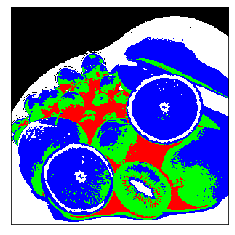

In [12]:
import numpy as np
def put_threshold(img, thresholds= [0.3, 0.5, 0.7, 1.0], colors= [(255,0,0), (0,255,0), (0,0,255), (255,255,255)]):
    out= np.zeros((img.shape[0], img.shape[1], 3))
    pvalue= 0.0
    for i in range(len(thresholds)):
        value= thresholds[i]* 255.0
        low= pvalue
        high= pvalue= value
        col= colors[i]
        print("Value: {}, Color: {}".format((low,high), col))
        mask_low= img[:,:]>low 
        mask_high= img[:,:]<high
        mask= np.logical_and(mask_low, mask_high)
        print("Mask sum is {}".format(np.sum(mask)))
        out[mask]= col
        ip.plot(out)
    
put_threshold(gimg)

Value: (0.0, 127.5), Color: 127.5
Mask sum is 23334
Value: (127.5, 153.0), Color: 153.0
Mask sum is 22719
Value: (153.0, 178.5), Color: 178.5
Mask sum is 8989
Value: (178.5, 204.0), Color: 204.0
Mask sum is 4797


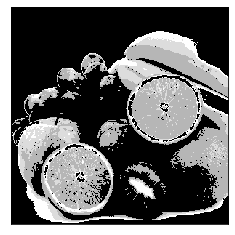

In [17]:
import numpy as np
def put_threshold(img, thresholds= [0.3, 0.5, 0.7, 1.0]):
    out= np.zeros((img.shape[0], img.shape[1]))
    pvalue= 0.0
    for i in range(len(thresholds)):
        value= thresholds[i]* 255.0
        low= pvalue
        high= pvalue= value
        print("Value: {}, Color: {}".format((low,high), high))
        mask_low= img[:,:]>low 
        mask_high= img[:,:]<high
        mask= np.logical_and(mask_low, mask_high)
        print("Mask sum is {}".format(np.sum(mask)))
        out[mask]= low
        ip.plot(out)
    
put_threshold(gimg, thresholds=[0.5, 0.6, 0.7, 0.8])

In [30]:
(values,counts) = np.unique(gimg,return_counts=True)
ind=np.argmax(counts)
print(values[ind])
counts= np.sort(counts)
counts[-5:]

255.0


array([  419,   441,  1084,  3570, 16180], dtype=int64)

Value: (0.0, 63.75), Color: 63.75
Mask sum is 5012
Value: (63.75, 127.5), Color: 127.5
Mask sum is 18322
Value: (127.5, 191.25), Color: 191.25
Mask sum is 34401
Value: (191.25, 255.0), Color: 255.0
Mask sum is 16085


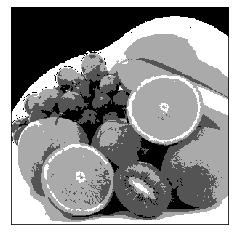

In [32]:
put_threshold(gimg, thresholds=[0.25, 0.5, 0.75, 1.0])

#### With Clustering

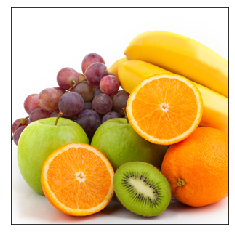

In [42]:
ip.plot(img)

In [33]:
from sklearn.cluster import KMeans

In [43]:
kmeans= KMeans(n_clusters= 5, random_state=42).fit(img.reshape(img.shape[0]* img.shape[1], img.shape[2]))

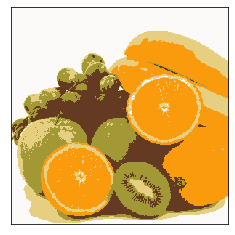

In [44]:
cluster_pic= kmeans.cluster_centers_[kmeans.labels_]
cluster_pic= cluster_pic.reshape(img.shape[0], img.shape[1], img.shape[2])
ip.plot(cluster_pic)

### Mask R-CNN 
**State of the art in imageSegmentation**